<a href="https://colab.research.google.com/github/sauvatu/HS-algorithm/blob/master/Chp4_Neural_Network_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Implementation of sum of error-squares.**

In [43]:
import numpy as np
import matplotlib as pylab

def mean_squared_error(y, t):
  return 0.5 *np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

z = mean_squared_error(np.array(y), np.array(t))
print("THE OUTPUT RESULT FOR FUNCTION mean_squared_error is: ", + z)

y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
z = mean_squared_error(np.array(y), np.array(t))
print("THE OUTPUT RESULT FOR FUNCTION mean_squared_error is: ", + z)


THE OUTPUT RESULT FOR FUNCTION mean_squared_error is:  0.09750000000000003
THE OUTPUT RESULT FOR FUNCTION mean_squared_error is:  0.5975


# **Python Implementation of Cross Entropy.**

In [44]:
import numpy as np

def cross_entropy_eror(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
z = cross_entropy_eror(np.array(y), np.array(t))
print("THE OUTPUT RESULT FOR FUNCTION cross_entropy_error is: ", + z)

y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
z = cross_entropy_eror(np.array(y), np.array(t))
print("THE OUTPUT RESULT FOR FUNCTION cross_entropy_error is: ", + z)

THE OUTPUT RESULT FOR FUNCTION cross_entropy_error is:  0.510825457099338
THE OUTPUT RESULT FOR FUNCTION cross_entropy_error is:  2.302584092994546


# **Mini-batch learning**

In [46]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('OUTPUT FOR X_BATCH IS: ', + x_batch)
print('OUTPUT FOR T_BATCH IS: ', + t_batch)

np.random.choice(60000,10)

(60000, 784)
(60000, 10)
OUTPUT FOR X_BATCH IS:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
OUTPUT FOR T_BATCH IS:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


array([55968,  3960, 18628, 24182, 54391,  1641, 27933, 18654,   948,
        8686])

# **Numerical Differentiation.**
In the slope method, the direction to be moved is determined based on the slope value. Before we look at what slope is and what it is, let's look at derivatives. Derivatives refer to the amount of change at a specific moment and represent the amount of change in a moment.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

def function_tmp1(x0):
  return x0**x0 + 4.0**2.0

print (numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1):
  return 3.0**2.0 + x1**x1
print (numerical_diff(function_tmp2, 4.0))


56.66253229954066
610.8913629813628


**Implementation of Gradient.**

In [48]:
def _numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

  x[idx] = float(tmp_val) + h
  fxh1 = f(x)

  x[idx] = tmp_val - h
  fxh2 = f(x)

  grad[idx] = (fxh1 - fxh2) / (2*h)
  x[idx] = tmp_val

  return grad
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = _numerical_gradient(f, x)
    x -= lr * grad

  return x



**Gradient Exercise**

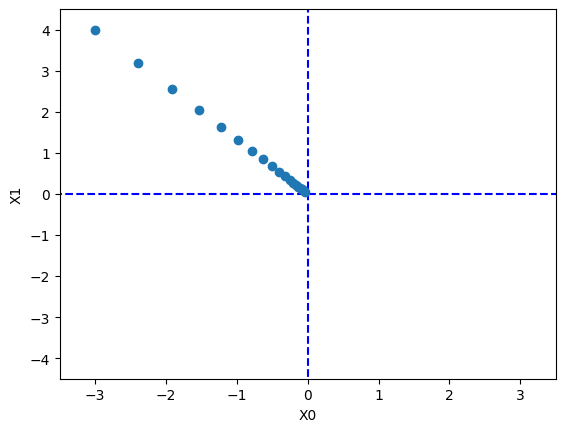

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from common.gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []  #A group dictionary that store the updated value of x

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot([0,0], [-5, 5], '--b')

plt.plot(x_history[:, 0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

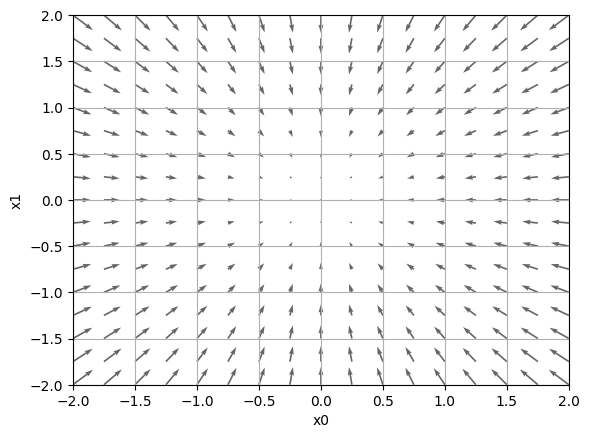

In [53]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

# **Implementing a gradient with a neural network as an example**

In [54]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)




[[ 0.16496954  0.18842456 -0.3533941 ]
 [ 0.24745431  0.28263685 -0.53009115]]


# **Implementing a gradient with neural network as an example**

In [55]:
net = simpleNet()
print(net.W)

"""[[ 0.47355232 0.9977393 0.84668094]
[ 0.85557411 0.03563661 0.69422093]]"""

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

#[ 1.05414809 0.63071653 1.1328074]
print(np.argmax(p)) # index of max value #2
t = np.array([0, 0, 1]) # label of answer print(net.loss(x, t))
# 0.92806853663411326

[[-0.43000717 -1.45227072 -0.34540833]
 [ 0.44478072 -0.17515887  1.1791097 ]]
[ 0.14229835 -1.02900541  0.85395373]
2


# **Implementing a two-layer Neural Network**

In [56]:
import sys, os
sys.path.append(os.pardir) #Configuration to import files from the parent directory
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def _init_(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #Weight initialization
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    #x: Input data, t: Teacher data
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    #x: Input data, t: Teacher data
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads



# **EVALUATING WITH EXAM DATA**

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7962166666666667, 0.8001
train acc, test acc | 0.8746833333333334, 0.8771
train acc, test acc | 0.8987833333333334, 0.9007
train acc, test acc | 0.9074333333333333, 0.9096
train acc, test acc | 0.9142166666666667, 0.9161
train acc, test acc | 0.9190666666666667, 0.9215
train acc, test acc | 0.9242833333333333, 0.9266
train acc, test acc | 0.9278666666666666, 0.9286
train acc, test acc | 0.9311666666666667, 0.9308
train acc, test acc | 0.9343, 0.9335
train acc, test acc | 0.9366333333333333, 0.9352
train acc, test acc | 0.9390166666666667, 0.9367
train acc, test acc | 0.9413666666666667, 0.94
train acc, test acc | 0.9437833333333333, 0.9404
train acc, test acc | 0.9452833333333334, 0.9425
train acc, test acc | 0.9467333333333333, 0.9452


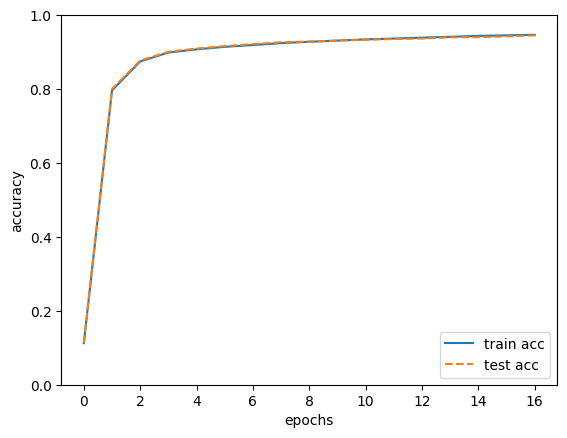

In [57]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # Gradient Calculation
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # Update parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# Drawing a graph
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()